In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('gender-classifier-DFE-791531.csv')

In [3]:
df.head()

,,,,,,,,,,,,,,,,,,,,,,,,,gender-classifier-DFE-791531
_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,gender_gold,link_color,name,profile_yn_gold,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
815719226,FALSE,finalized,3,10/26/15 23:24,male,1,yes,1,12/5/13 1:48,i sing my own rhythm.,0,NaN,08C2C2,sheezy0,NaN,https://pbs.twimg.com/profile_images/414342229096808449/fYvzqXN7_normal.png,0,FFFFFF,Robbie E Responds To Critics After Win Against Eddie Edwards In The #WorldTitleSeries https://t.co/NSybBmVjKZ,NaN,110964,10/26/15 12:40,6.5873E+17,main; @Kan1shk3,Chennai
815719227,FALSE,finalized,3,10/26/15 23:30,male,1,yes,1,10/1/12 13:51,I'm the author of novels filled with family drama and romance.,68,NaN,0084B4,DavdBurnett,NaN,https://pbs.twimg.com/profile_images/539604221532700673/WW16tBbU_normal.jpeg,0,C0DEED,‰ЫПIt felt like they were my friends and I was living the story with them‰Ыќ https://t.co/arngE0YHNO #retired #IAN1 https://t.co/CIzCANPQFz,NaN,7471,10/26/15 12:40,6.5873E+17,NaN,Eastern Time (US & Canada)
815719228,FALSE,finalized,3,10/26/15 23:33,male,0.6625,yes,1,11/28/14 11:30,louis whining and squealing and all,7696,NaN,ABB8C2,lwtprettylaugh,NaN,https://pbs.twimg.com/profile_images/657330418249658368/SBLCXdF7_normal.png,1,C0DEED,i absolutely adore when louis starts the songs it hits me hard but it feels good,NaN,5617,10/26/15 12:40,6.5873E+17,clcncl,Belgrade
815719229,FALSE,finalized,3,10/26/15 23:10,male,1,yes,1,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Perkins, Yahoo!, Sprint PCS, AirTouch, Air Force. Stanford GSB, UVa. Dad, Husband, Brother. Golfer.",202,NaN,0084B4,douggarland,NaN,https://pbs.twimg.com/profile_images/259703936/IMG_8444_normal.JPG,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you use @IFTTT?! Don't typically see an advanced user on the @PGATOUR! https://t.co/H68ou5PE9L,NaN,1693,10/26/15 12:40,6.5873E+17,"Palo Alto, CA",Pacific Time (US & Canada)


### 這邊發現原本要的columns 和 數據 都在表格的「數據」中，於是要提出來重新做一個表格

In [28]:
columns_names = df.index[0]

In [32]:
value = df.index[1:]

In [36]:
list(columns_names)

['_unit_id',
 '_golden',
 '_unit_state',
 '_trusted_judgments',
 '_last_judgment_at',
 'gender',
 'gender:confidence',
 'profile_yn',
 'profile_yn:confidence',
 'created',
 'description',
 'fav_number',
 'gender_gold',
 'link_color',
 'name',
 'profile_yn_gold',
 'profileimage',
 'retweet_count',
 'sidebar_color',
 'text',
 'tweet_coord',
 'tweet_count',
 'tweet_created',
 'tweet_id',
 'tweet_location']

In [44]:
column_names = list(columns_names)

In [41]:
len(list(value))

20050

In [47]:
value = np.array(list(value))

In [50]:
value.reshape(20050, 25)

array([['815719226', 'FALSE', 'finalized', ..., '10/26/15 12:40',
        '6.5873E+17', 'main; @Kan1shk3'],
       ['815719227', 'FALSE', 'finalized', ..., '10/26/15 12:40',
        '6.5873E+17', 'nan'],
       ['815719228', 'FALSE', 'finalized', ..., '10/26/15 12:40',
        '6.5873E+17', 'clcncl'],
       ...,
       ['815757830', 'TRUE', 'golden', ..., '10/26/15 13:20',
        '6.5874E+17', 'Lagos Nigeria '],
       ['815757921', 'TRUE', 'golden', ..., '10/26/15 12:40',
        '6.5873E+17', 'Texas Hill Country'],
       ['815757985', 'TRUE', 'golden', ..., '10/26/15 13:19',
        '6.5874E+17', 'nan']], dtype='<U465')

In [51]:
df2 = pd.DataFrame(value, columns=column_names)

In [56]:
df2[:0]

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profile_yn_gold,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location


### 表格重做完畢，儲存

In [55]:
df2.to_csv('project_data.csv')

### 提取第一次要用的特徵,['description', 'sidebar_color', 'profileimage', 'gender']

In [63]:
df2.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location'],
      dtype='object')

In [76]:
df2.loc[:,['description', 'sidebar_color', 'profileimage', 'gender']]

,description,sidebar_color,profileimage,gender
0,i sing my own rhythm.,FFFFFF,https://pbs.twimg.com/profile_images/414342229...,male
1,I'm the author of novels filled with family dr...,C0DEED,https://pbs.twimg.com/profile_images/539604221...,male
2,louis whining and squealing and all,C0DEED,https://pbs.twimg.com/profile_images/657330418...,male
3,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",C0DEED,https://pbs.twimg.com/profile_images/259703936...,male
4,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,0,https://pbs.twimg.com/profile_images/564094871...,female
...,...,...,...,...
20045,(rp),C0DEED,https://pbs.twimg.com/profile_images/656793310...,female
20046,"Whatever you like, it's not a problem at all. ...",0,https://pbs.twimg.com/profile_images/639815429...,male
20047,#TeamBarcelona ..You look lost so you should f...,C0DEED,https://pbs.twimg.com/profile_images/655473271...,male
20048,Anti-statist; I homeschool my kids. Aspiring t...,0,https://pbs.twimg.com/profile_images/657716093...,female


In [77]:
df3 = df2.loc[:,['description', 'sidebar_color', 'profileimage', 'gender']]

### 提取完，儲存

In [79]:
df3.to_csv('p_1.csv')

### profileimage裡的圖片只有連結，先下載下來

In [89]:
df3.iloc[:,2]

0        https://pbs.twimg.com/profile_images/414342229...
1        https://pbs.twimg.com/profile_images/539604221...
2        https://pbs.twimg.com/profile_images/657330418...
3        https://pbs.twimg.com/profile_images/259703936...
4        https://pbs.twimg.com/profile_images/564094871...
                               ...                        
20045    https://pbs.twimg.com/profile_images/656793310...
20046    https://pbs.twimg.com/profile_images/639815429...
20047    https://pbs.twimg.com/profile_images/655473271...
20048    https://pbs.twimg.com/profile_images/657716093...
20049    https://pbs.twimg.com/profile_images/655134724...
Name: profileimage, Length: 20050, dtype: object

In [92]:
from urllib.request import urlopen
import requests 

In [93]:
image_url = df3.iloc[0,2]
r = requests.get(image_url)

In [94]:
r.status_code

200

In [111]:
print(r.content)

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x000\x00\x00\x000\x08\x06\x00\x00\x00W\x02\xf9\x87\x00\x00\x1a\x07IDATh\x05\x15\xc1g\x90]\xe7a\x98\xe1\xf7;\xfd\x9c\xdb\xef\xf6\n,\xca\x12\xc0\x82\x04\x08\x92 \x00\x16Q\x12\xabH\x15;\xe4(2\xf3#\xd1\x8f83\xb1\xe3\x89\x9d\xd8\x93\x91d\x89\x92\x15%\xb2g<V\x12\'J\xc6j\x91\x14\xc9*V\xa1X\xc4N\x8a\r\x14\x88B\xa2.\xb6\xd7\xbb{\xf7\xf6{O\xff\xbe\x8c\x9eG\xa4\xff\xf7KJ\xcb\x85`Hd"\x88Wu4Gb\xce\xc4\xb4\xdaC\xb4V\x1b\x8c\x1c\xcb\x93T\x9b\xac\xbd\xdb ^\x8f(h\x1e\xe6\xae!\xd6\xb6Wi\xd6j(\x04\x9a\xae@j\xe8:\xa8$elf\x9a\xf1\x8f\xedGx\xdb\x08\x15\x93t\x8b\xac\xff\xe4\n\xc9|\x97\xb6\x1f\xd0\x1e\xf3(\x9c\xbc\x9f]\xb7\xdcO\xa6\xe8\x12\x87\n\x99h(]!\x84\x00\xa9\x08\x83\x08!4\x0c\xd3@\xd3A\xd3\x14\xba\xae\x91$\x928\x92\xc88F\xc8\xef|I\t7\x01;&\xed\xe9\xc4\x1b\x1aF\x7f\x841\x13\x10\x89\x01\xe2n\x1e\xc7m\xb3yz\x83\xc6\xe5\x1ee\x91\xc7\xcd\xe7i:\x01+\xebk\xe8\n<\xc3F\xea)a\x98\x92\n\x85\x8c#F\x0fL2\xf5\xcfoBYk\xe8V\x81\xfa\xbb\x1dz\xcf\xad\x93T\x03\x1aZ\x8c\x7f\xc

In [101]:
r.content

173

In [103]:
from PIL import Image

In [115]:
import os
os.makedirs('./project/',exist_ok=True)
with open('./project/1.png','wb') as f:
    f.write(r.content)

In [116]:
len(df3)

20050

In [120]:
import time

In [124]:
for i in range(17624, len(df3)):
    image_url = df3.iloc[i,2]
    r = requests.get(image_url)
    print(i, end='  ')
    if r.status_code == 200:
        with open('./project/'+str(i) + '.png','wb') as f:
            f.write(r.content)
        print('success')
    else:
        print('fail')
    time.sleep(0.1)

17624  fail
17625  fail
17626  success
17627  fail
17628  fail
17629  fail
17630  fail
17631  success
17632  fail
17633  fail
17634  success
17635  fail
17636  success
17637  fail
17638  fail
17639  success
17640  fail
17641  fail
17642  fail
17643  fail
17644  success
17645  fail
17646  fail
17647  fail
17648  fail
17649  fail
17650  fail
17651  fail
17652  fail
17653  fail
17654  success
17655  fail
17656  fail
17657  fail
17658  success
17659  fail
17660  fail
17661  fail
17662  fail
17663  fail
17664  fail
17665  fail
17666  success
17667  fail
17668  success
17669  fail
17670  fail
17671  fail
17672  fail
17673  fail
17674  fail
17675  fail
17676  fail
17677  fail
17678  success
17679  fail
17680  fail
17681  success
17682  fail
17683  fail
17684  success
17685  success
17686  fail
17687  success
17688  fail
17689  fail
17690  success
17691  fail
17692  success
17693  fail
17694  success
17695  fail
17696  fail
17697  fail
17698  fail
17699  fail
17700  fail
17701  fail
17702  suc

18270  fail
18271  success
18272  fail
18273  fail
18274  fail
18275  success
18276  success
18277  fail
18278  fail
18279  fail
18280  success
18281  success
18282  fail
18283  success
18284  fail
18285  fail
18286  fail
18287  fail
18288  success
18289  fail
18290  fail
18291  success
18292  fail
18293  fail
18294  success
18295  fail
18296  fail
18297  fail
18298  fail
18299  fail
18300  success
18301  fail
18302  fail
18303  fail
18304  fail
18305  fail
18306  fail
18307  fail
18308  fail
18309  fail
18310  fail
18311  fail
18312  fail
18313  fail
18314  fail
18315  fail
18316  fail
18317  fail
18318  success
18319  fail
18320  fail
18321  success
18322  success
18323  success
18324  success
18325  fail
18326  fail
18327  fail
18328  success
18329  fail
18330  success
18331  fail
18332  fail
18333  fail
18334  fail
18335  fail
18336  fail
18337  fail
18338  success
18339  success
18340  fail
18341  fail
18342  fail
18343  fail
18344  success
18345  fail
18346  fail
18347  fail
1834

18907  success
18908  success
18909  success
18910  success
18911  success
18912  success
18913  fail
18914  success
18915  fail
18916  fail
18917  fail
18918  fail
18919  fail
18920  fail
18921  fail
18922  fail
18923  success
18924  fail
18925  success
18926  fail
18927  fail
18928  success
18929  fail
18930  success
18931  success
18932  success
18933  fail
18934  success
18935  fail
18936  success
18937  fail
18938  fail
18939  fail
18940  fail
18941  fail
18942  fail
18943  fail
18944  fail
18945  fail
18946  success
18947  success
18948  fail
18949  success
18950  fail
18951  success
18952  fail
18953  success
18954  fail
18955  fail
18956  fail
18957  fail
18958  fail
18959  fail
18960  success
18961  fail
18962  fail
18963  fail
18964  fail
18965  fail
18966  success
18967  success
18968  success
18969  success
18970  success
18971  success
18972  success
18973  success
18974  success
18975  success
18976  success
18977  success
18978  success
18979  success
18980  success
1898

19525  fail
19526  success
19527  success
19528  fail
19529  fail
19530  fail
19531  fail
19532  fail
19533  fail
19534  fail
19535  success
19536  fail
19537  fail
19538  fail
19539  fail
19540  success
19541  success
19542  fail
19543  fail
19544  fail
19545  success
19546  success
19547  success
19548  success
19549  success
19550  success
19551  success
19552  success
19553  success
19554  success
19555  success
19556  success
19557  fail
19558  success
19559  fail
19560  success
19561  fail
19562  fail
19563  fail
19564  fail
19565  fail
19566  success
19567  fail
19568  fail
19569  fail
19570  fail
19571  fail
19572  fail
19573  fail
19574  fail
19575  fail
19576  fail
19577  fail
19578  success
19579  fail
19580  fail
19581  success
19582  success
19583  success
19584  fail
19585  fail
19586  fail
19587  fail
19588  fail
19589  fail
19590  fail
19591  fail
19592  fail
19593  success
19594  fail
19595  success
19596  fail
19597  fail
19598  fail
19599  success
19600  fail
19601  

### 下載完畢，耗時約4個小時，因有些連節已失效，故只有大約1/3的資料（6476筆）
### 下面試做將圖片轉array

In [153]:
im = Image.open('./project/0.png')

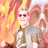

In [154]:
im

In [206]:
im = im.convert("RGB")

### 只考慮RGB這三個通道

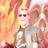

In [207]:
im

In [208]:
np.array(im)

array([[[253, 163, 131],
        [255, 176, 124],
        [255, 180, 122],
        ...,
        [245, 243, 253],
        [240, 237, 251],
        [238, 232, 246]],

       [[254, 162, 131],
        [255, 171, 127],
        [255, 178, 122],
        ...,
        [239, 234, 247],
        [236, 232, 247],
        [232, 227, 237]],

       [[254, 162, 130],
        [255, 171, 128],
        [254, 184, 120],
        ...,
        [234, 226, 234],
        [232, 221, 229],
        [224, 213, 217]],

       ...,

       [[254, 159, 128],
        [252, 194, 172],
        [252, 241, 228],
        ...,
        [173,  75,  79],
        [194,  73,  92],
        [220,  77, 107]],

       [[254, 153, 134],
        [253, 161, 133],
        [247, 160, 164],
        ...,
        [178,  67,  76],
        [206,  68,  97],
        [230,  77, 117]],

       [[252, 119, 138],
        [250, 115, 131],
        [247, 102, 128],
        ...,
        [169,  49,  71],
        [202,  59,  96],
        [242,  88, 126]]

In [168]:
im_n = np.array(im)

### 套用，並將缺失資料設為NaN

In [209]:
df4 = df3
for i in range(len(df3)):
    print('\r',i,end='')
    try:
        im = Image.open('./project/'+ str(i) +'.png')
        im = im.convert("RGB")
        im_n = np.array(im)
        df4.iloc[i,2]=im_n
    except :
        df4.iloc[i,2]=np.nan 

 13436

/Users/ivan/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 20049

In [210]:
df4

,description,sidebar_color,profileimage,gender
0,i sing my own rhythm.,FFFFFF,"[[[253, 163, 131], [255, 176, 124], [255, 180,...",male
1,I'm the author of novels filled with family dr...,C0DEED,"[[[119, 109, 97], [118, 108, 98], [116, 108, 9...",male
2,louis whining and squealing and all,C0DEED,NaN,male
3,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",C0DEED,NaN,male
4,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,0,"[[[255, 246, 249], [255, 247, 250], [254, 248,...",female
...,...,...,...,...
20045,(rp),C0DEED,NaN,female
20046,"Whatever you like, it's not a problem at all. ...",0,NaN,male
20047,#TeamBarcelona ..You look lost so you should f...,C0DEED,NaN,male
20048,Anti-statist; I homeschool my kids. Aspiring t...,0,NaN,female


In [211]:
df4.dropna(axis=0,how='any')

,description,sidebar_color,profileimage,gender
0,i sing my own rhythm.,FFFFFF,"[[[253, 163, 131], [255, 176, 124], [255, 180,...",male
1,I'm the author of novels filled with family dr...,C0DEED,"[[[119, 109, 97], [118, 108, 98], [116, 108, 9...",male
4,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,0,"[[[255, 246, 249], [255, 247, 250], [254, 248,...",female
7,The secret of getting ahead is getting started.,C0DEED,"[[[245, 250, 244], [250, 250, 248], [255, 250,...",male
10,Clean food that tastes great while providing e...,C0DEED,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",brand
...,...,...,...,...
20037,"Typographer and typographic consultant, co-fou...",FFFFFF,"[[[87, 111, 111], [77, 100, 106], [74, 98, 110...",male
20038,The FUN site for Animal Lovers - Get the lates...,C0DEED,"[[[243, 237, 255], [243, 237, 255], [243, 237,...",brand
20039,You can find me where the wild things are,C0DEED,"[[[39, 23, 50], [37, 21, 47], [43, 23, 48], [5...",female
20042,"Reviews of delectable #food, picturesque #trav...",948C75,"[[[71, 48, 0], [135, 112, 62], [134, 111, 67],...",brand


In [212]:
df4 = df4.dropna(axis=0,how='any')

In [213]:
df4.to_csv('p_1_array.csv')

In [217]:
df4.iloc[0,2].shape

(48, 48, 3)

In [226]:
df4.index=range(len(df4))

In [227]:
df4

,description,sidebar_color,profileimage,gender
0,i sing my own rhythm.,FFFFFF,"[[[253, 163, 131], [255, 176, 124], [255, 180,...",male
1,I'm the author of novels filled with family dr...,C0DEED,"[[[119, 109, 97], [118, 108, 98], [116, 108, 9...",male
2,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,0,"[[[255, 246, 249], [255, 247, 250], [254, 248,...",female
3,The secret of getting ahead is getting started.,C0DEED,"[[[245, 250, 244], [250, 250, 248], [255, 250,...",male
4,Clean food that tastes great while providing e...,C0DEED,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",brand
...,...,...,...,...
6470,"Typographer and typographic consultant, co-fou...",FFFFFF,"[[[87, 111, 111], [77, 100, 106], [74, 98, 110...",male
6471,The FUN site for Animal Lovers - Get the lates...,C0DEED,"[[[243, 237, 255], [243, 237, 255], [243, 237,...",brand
6472,You can find me where the wild things are,C0DEED,"[[[39, 23, 50], [37, 21, 47], [43, 23, 48], [5...",female
6473,"Reviews of delectable #food, picturesque #trav...",948C75,"[[[71, 48, 0], [135, 112, 62], [134, 111, 67],...",brand


In [229]:
df4.to_csv('p_1_array_reindex.csv')